In [1]:
!pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import solovay_kitaev as sk
from math import e, pi

# Basic usage

In [3]:
# Unitary matrix you want to approximate
# Rz(1/16)
target = sk.Uop.from_matrix([[1,0],[0, e**(1j*pi/32)]], gateset=sk.ht_gateset())

# execute Solovay Kitaev algorithm
result = sk.execute_solovay_kitaev(target, 4)

# print out the calculated gates
print(result.construction_str())

THTHTHTHTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTHTTHTHTHTHTHTTHTHTTHTHTHTTTTTTHTTTTTTHTTTTTTHTTTTTTTHTTTTTTTHTHTHTHTHTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTHTTTTTTTHTHTHTHTHTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTHTHTTHTTHTTHTTTTTTTHTTTTTTTHTTTTTTHTTTTTTTHTTTTTTHTTTTTTTHTHTHTHTHTHTTHTHTTHTHTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTHTTHTHTHTHTHTHTHTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTHTHTHTHTHTHTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTHTTHTTHTHTHTHTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTHTTTTTTTHTHTHTHTHTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTHTHTHTHTTHTHTTTTTTTHTTTTTTHTTTTTTTHTTTTTTTHTTTTTTHTTTTTTTHTHTHTTHTHTHTHTHTHTHTHTHTTTTTTTHTTTTTTTHTTTTTTHTTTTTTTHTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTHTTHTHTTHTHTHTTTTTTHTTTTTTHTTTTTTHTTTTTTTHTTTTTTTHTHTHTHTHTTHTHTHTHTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTHTTHTHTHTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHTTTTTTTHT

In [9]:
# (number of gates, distance) per iteration
counts = 10
x = []
distances = []
length = []
number_T = []

for i in range(counts):
    result = sk.execute_solovay_kitaev(target, i)
    l = len(result.construction)
    d = target.operator_distance(result)
    t = len([t for t in result.construction if t == 'T'])
    x.append(i)
    length.append(l)
    distances.append(d)
    number_T.append(t)
    print("iteration: {}, length: {} (T gates {} / {:.4f}%), distance: {:e}".format(i
                                                                    , l, t, (t/l*100 if l!=0 else 0), d))

iteration: 0, length: 10 (T gates 5 / 50.0000%), distance: 1.838392e-01
iteration: 1, length: 72 (T gates 53 / 73.6111%), distance: 4.612256e-02
iteration: 2, length: 394 (T gates 309 / 78.4264%), distance: 8.149641e-02
iteration: 3, length: 1904 (T gates 1517 / 79.6744%), distance: 1.448289e-02
iteration: 4, length: 9354 (T gates 7477 / 79.9337%), distance: 3.430739e-03
iteration: 5, length: 45476 (T gates 36373 / 79.9828%), distance: 2.739081e-04
iteration: 6, length: 246896 (T gates 197509 / 79.9968%), distance: 3.449814e-06
iteration: 7, length: 1198124 (T gates 958493 / 79.9995%), distance: 1.517936e-08


ZeroDivisionError: float division by zero

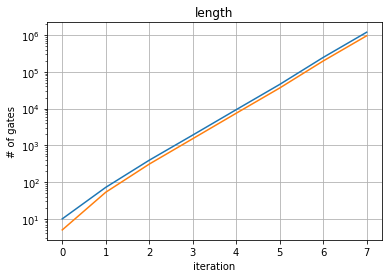

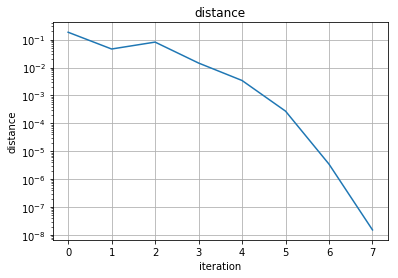

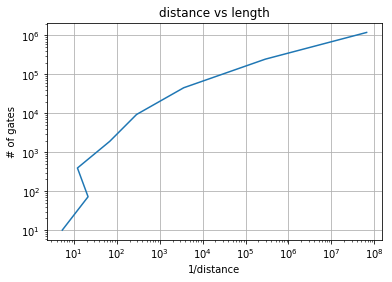

In [10]:
plt.figure()
#plt.subplot(3,1,1)
plt.plot(x, length)
plt.plot(x, number_T)
plt.yscale('log')
plt.title('length')
plt.xlabel('iteration')
plt.ylabel('# of gates')
plt.grid(True)

plt.figure()
#plt.subplot(3,1,2)
plt.plot(x, distances)
plt.yscale('log')
plt.title('distance')
plt.xlabel('iteration')
plt.ylabel('distance')
plt.grid(True)

plt.figure()
#plt.subplot(3,1,3)
plt.plot([1.0/d for d in distances], length)
plt.yscale('log')
plt.xscale('log')
plt.title('distance vs length')
plt.xlabel('1/distance')
plt.ylabel('# of gates')
plt.grid(True)


In [18]:
# (number of gates, distance) per iteration
counts = 20
x = []
distances = []
length = []
number_T = []

for i in range(counts):
    enet = sk.clifford_gateset(i).epsilon_net()
    target = sk.Uop.from_matrix([[1,0],[0, e**(1j*pi/32)]], gateset=sk.ht_gateset(i))
    result = sk.execute_solovay_kitaev(target, 6)
    x.append(i)
    l = len(result.construction)
    d = target.operator_distance(result)
    t = len([t for t in result.construction if t == 'T'])
    length.append(l)
    distances.append(d)
    number_T.append(t)
    print(f"ε0 length:{i} (size:{len(enet)}), length: {l} (T gates {t} / {(t/l*100 if l!=0 else 0):.4f}%),"
          f" distance: {d:e}")

ε0 length:0 (size:96), length: 1 (T gates 1 / 100.0000%), distance: 4.382025e-01
ε0 length:1 (size:96), length: 1 (T gates 1 / 100.0000%), distance: 4.382025e-01
ε0 length:2 (size:240), length: 321 (T gates 257 / 80.0623%), distance: 6.453576e-01
ε0 length:3 (size:528), length: 26051 (T gates 20841 / 80.0008%), distance: 8.852618e-01
ε0 length:4 (size:1104), length: 35677 (T gates 28545 / 80.0095%), distance: 1.516287e+00
ε0 length:5 (size:2256), length: 51539 (T gates 41233 / 80.0035%), distance: 1.504544e+00
ε0 length:6 (size:4560), length: 58481 (T gates 46785 / 80.0003%), distance: 9.673346e-01
ε0 length:7 (size:9168), length: 91701 (T gates 73359 / 79.9980%), distance: 2.647706e-02


KeyboardInterrupt: 

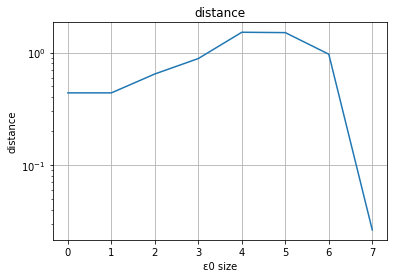

In [19]:
plt.figure()
plt.plot(x, distances)
plt.yscale('log')
plt.title('distance')
plt.xlabel('ε0 size')
plt.ylabel('distance')
plt.grid(True)